In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv("athlete_events.csv")

In [65]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [66]:
df.shape

(271116, 15)

In [67]:
# Need only summer data 
df = df[df["Season"] == 'Summer']

In [68]:
df.shape

(222552, 15)

In [69]:
region_df = pd.read_csv("noc_regions.csv")

In [70]:
region_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [71]:
df = df.merge(region_df, on = 'NOC', how = 'left')

In [72]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [73]:
# All the countries which have participated in Olympics
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [74]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [75]:
df.duplicated().sum()

1385

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
#removed the duplicated values
df.duplicated().sum()

0

In [78]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [79]:
# Since we have no missing values in NOC , so we will group by NOC for the medals

# we check the gold silver and bronze
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis =1) # it will create dummy variables

In [80]:
df.shape

(221167, 20)

In [81]:
# gives the the gold silver and bronze medals
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index().head(30)

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
5,FRA,463.0,567.0,587.0
6,HUN,432.0,328.0,363.0
7,SWE,354.0,396.0,358.0
8,AUS,342.0,452.0,510.0
9,GDR,339.0,277.0,227.0


In [82]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')] 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [83]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC','Games','Year','City', 'Sport','Event', 'Medal'])

In [84]:
medal_df.shape

(105636, 20)

In [85]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [86]:
# gives the the gold silver and bronze medals
medal_tally = medal_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [87]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [88]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [89]:
# kin countries me olympic khela gya

years = df['Year'].unique().tolist()

In [90]:
years.sort()

In [91]:
# insert(what position, what to add)
years.insert(0, 'Overall')

In [92]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [93]:
countries = np.unique(df['region'].dropna().values).tolist()

In [94]:
countries.sort()

In [95]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [96]:
countries.insert(0, 'Overall')

In [97]:
countries

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [98]:
def fetch_medal_tally(year,country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC','Games','Year','City', 'Sport','Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
        
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    return x

In [99]:
fetch_medal_tally('Overall', 'France')

,Year,Gold,Silver,Bronze,total
0,1896,5,4,2,11
1,1900,29,41,39,109
2,1904,0,2,0,2
3,1906,15,10,16,41
4,1908,5,5,9,19
5,1912,7,5,3,15
6,1920,9,20,13,42
7,1924,14,14,12,40
8,1928,7,12,6,25
9,1932,11,5,4,20


In [100]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC','Games','Year','City', 'Sport','Event', 'Medal'])

In [101]:
medal_df[(medal_df['Year'] == 2012) & (medal_df['region'] == 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
7064,4523,Seema Antil,F,28.0,182.0,92.0,India,IND,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
11742,7488,Rahul Banerjee,M,25.0,179.0,80.0,India,IND,2012 Summer,2012,Summer,London,Archery,Archery Men's Individual,NaN,India,NaN,0,0,0
11743,7488,Rahul Banerjee,M,25.0,179.0,80.0,India,IND,2012 Summer,2012,Summer,London,Archery,Archery Men's Team,NaN,India,NaN,0,0,0
17768,11185,Jai Bhagwan,M,27.0,NaN,NaN,India,IND,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Lightweight,NaN,India,NaN,0,0,0
17832,11219,Mahesh Shrinivas Bhupathi,M,38.0,185.0,88.0,India-1,IND,2012 Summer,2012,Summer,London,Tennis,Tennis Men's Doubles,NaN,India,NaN,0,0,0
18445,11601,Abhinav Bindra,M,29.0,173.0,70.0,India,IND,2012 Summer,2012,Summer,London,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India,NaN,0,0,0
31878,19583,Rushmi Chakravarthi,F,34.0,170.0,65.0,India,IND,2012 Summer,2012,Summer,London,Tennis,Tennis Women's Doubles,NaN,India,NaN,0,0,0
32551,19995,Garima Chaudhary,F,22.0,NaN,63.0,India,IND,2012 Summer,2012,Summer,London,Judo,Judo Women's Half-Middleweight,NaN,India,NaN,0,0,0
33469,20562,Bharat Kumar Chetri,M,30.0,NaN,NaN,India,IND,2012 Summer,2012,Summer,London,Hockey,Hockey Men's Hockey,NaN,India,NaN,0,0,0
34434,21197,Shagun Chowdhary,F,29.0,NaN,NaN,India,IND,2012 Summer,2012,Summer,London,Shooting,Shooting Women's Trap,NaN,India,NaN,0,0,0


In [102]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


## Overall Analysis

1. No of editions
2. No of cities
3. No of events/sports
4. No of athletes
5. Participating nations

In [41]:
df['Year'] = df['Year'].unique().shape[0] -1

In [42]:
# no of cities
df['City'].unique().shape[0]

23

In [43]:
# No of sports or events
df['Sport'].unique().shape[0]


52

In [44]:
df['Event'].unique().shape[0]

651

In [45]:
df['Name'].unique().shape[0]

116122

In [46]:
df['region'].unique().shape[0]

206

In [103]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [104]:
df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()

,index,Year
0,2016,204
1,2012,203
2,2008,202
3,2004,200
4,2000,199
5,1996,196
6,1992,168
7,1988,156
8,1984,139
9,1972,120


In [105]:
# Calculating the number of participating nations overtime 
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()

In [106]:
nations_over_time

,index,Year
0,2016,204
1,2012,203
2,2008,202
3,2004,200
4,2000,199
5,1996,196
6,1992,168
7,1988,156
8,1984,139
9,1972,120


In [107]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with the necessary data
# If not, replace df with your actual DataFrame
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

# Rename columns for clarity
nations_over_time.rename(columns={'index':'Edition', 'Year':'No of nations'}, inplace=True)

# Create a line chart using Plotly Express
fig = px.line(nations_over_time, x='Edition', y='No of nations', title='Number of nations')

# Show the plot
fig.show()

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
#Over the years, in every sport how many events occured 
# X axis - years/editions
# Y axis - Sports
# Creating a heat map

In [110]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [111]:
"""
values: Specifies the column to aggregate (in this case, the 'Value' column).
index: Specifies the column to be used as the index of the pivot table (in this case, the 'Date' column).
columns: Specifies the column to be used as the columns of the pivot table (in this case, the 'Category' column).
aggfunc: Specifies the aggregation function to use when there are duplicate entries for the same group of index and columns. Here, we use the sum function to add up the values.

"""
pivot_table = x.pivot_table(index = 'Sport', columns='Year', values = 'Event', aggfunc='count').fillna(0).astype('int')

<AxesSubplot:xlabel='Year', ylabel='Sport'>

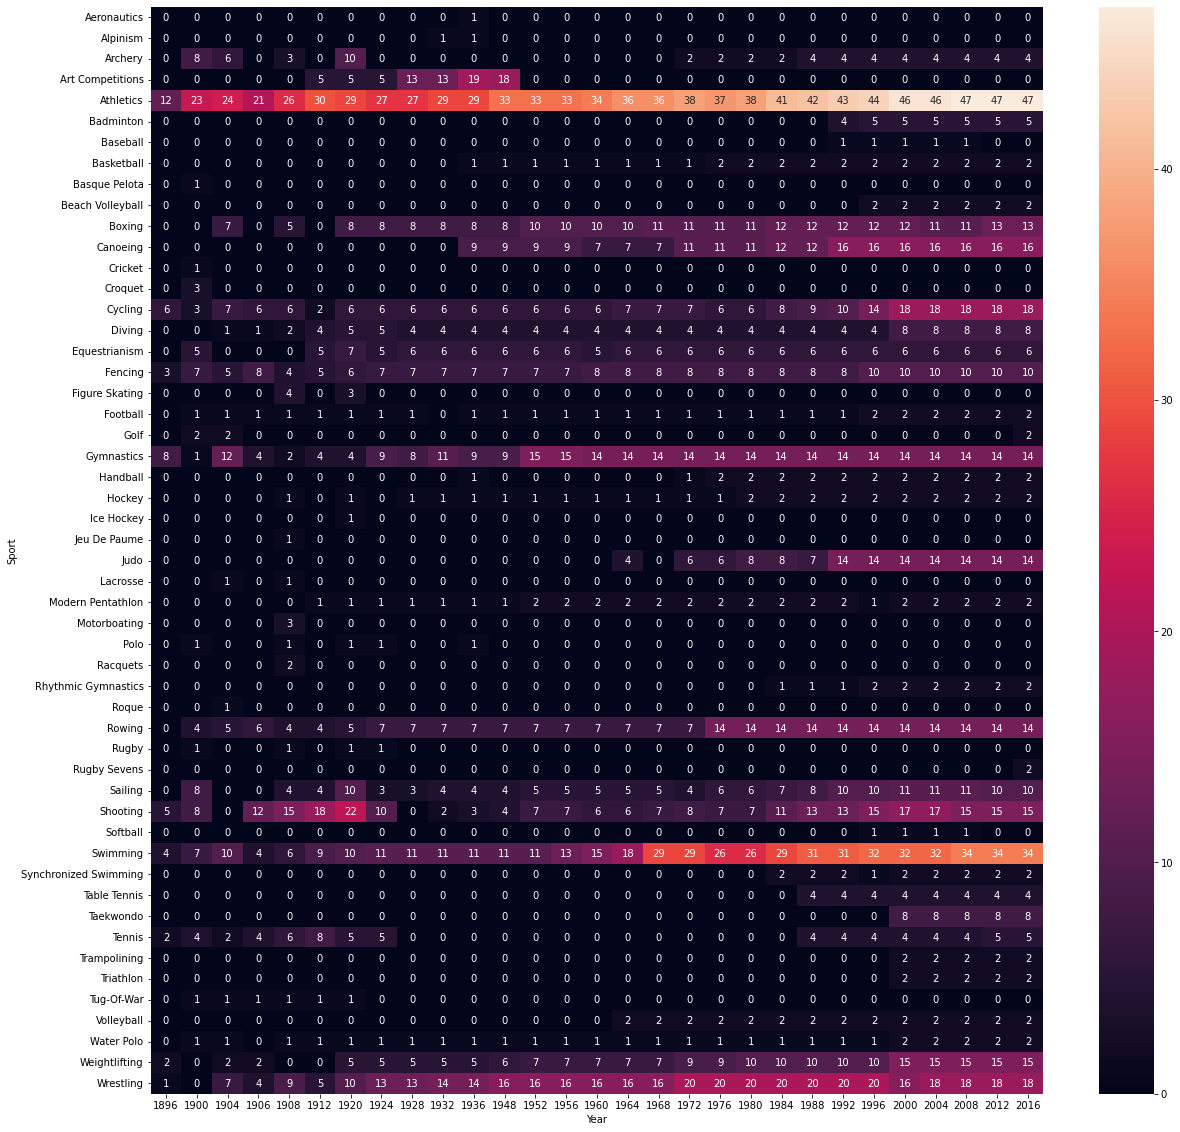

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot_table, annot=True)

In [113]:
def most_successful(df, sport):
    temp_df = df.dropna(subset = ['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
#     return temp_df['Name'].value_counts().reset_index()
        
    x = temp_df['Name'].value_counts().reset_index().merge(df, left_on = 'index', right_on = 'Name', how = 'left')
    y = x[['index', 'Name_x', 'Sport', 'region']].drop_duplicates()
    final_df = y.rename(columns = {'index': 'Name', 'Name_x': 'Medal_count'})
    return final_df.head(15)
    

In [114]:
most_successful(df,'Overall')

,Name,Medal_count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
129,Takashi Ono,13,Judo,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA


## Country Wise medal tally

1. Country wise medal tally per year (line plot)
2. What countries are good (heatmap)
3. Most successful athletes (Top 10)

In [115]:
temp_df = df.dropna(subset = ['Medal'])

In [116]:
temp_df.drop_duplicates(subset=['Team', 'NOC','Games','Year','City', 'Sport','Event', 'Medal'], inplace = True)

/var/folders/2m/bcrsq2rn60n_0qbc80sw7mqm0000gn/T/ipykernel_66215/384457575.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [118]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
temp_df = df.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC','Games','Year','City', 'Sport','Event', 'Medal'], inplace = True)
new_df = temp_df[temp_df['region'] == 'UK']

/var/folders/2m/bcrsq2rn60n_0qbc80sw7mqm0000gn/T/ipykernel_66215/25355801.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
pivot_table = new_df.pivot_table(index = 'Sport', columns='Year', values = 'Medal', aggfunc='count').fillna(0).astype('int')

<AxesSubplot:xlabel='Year', ylabel='Sport'>

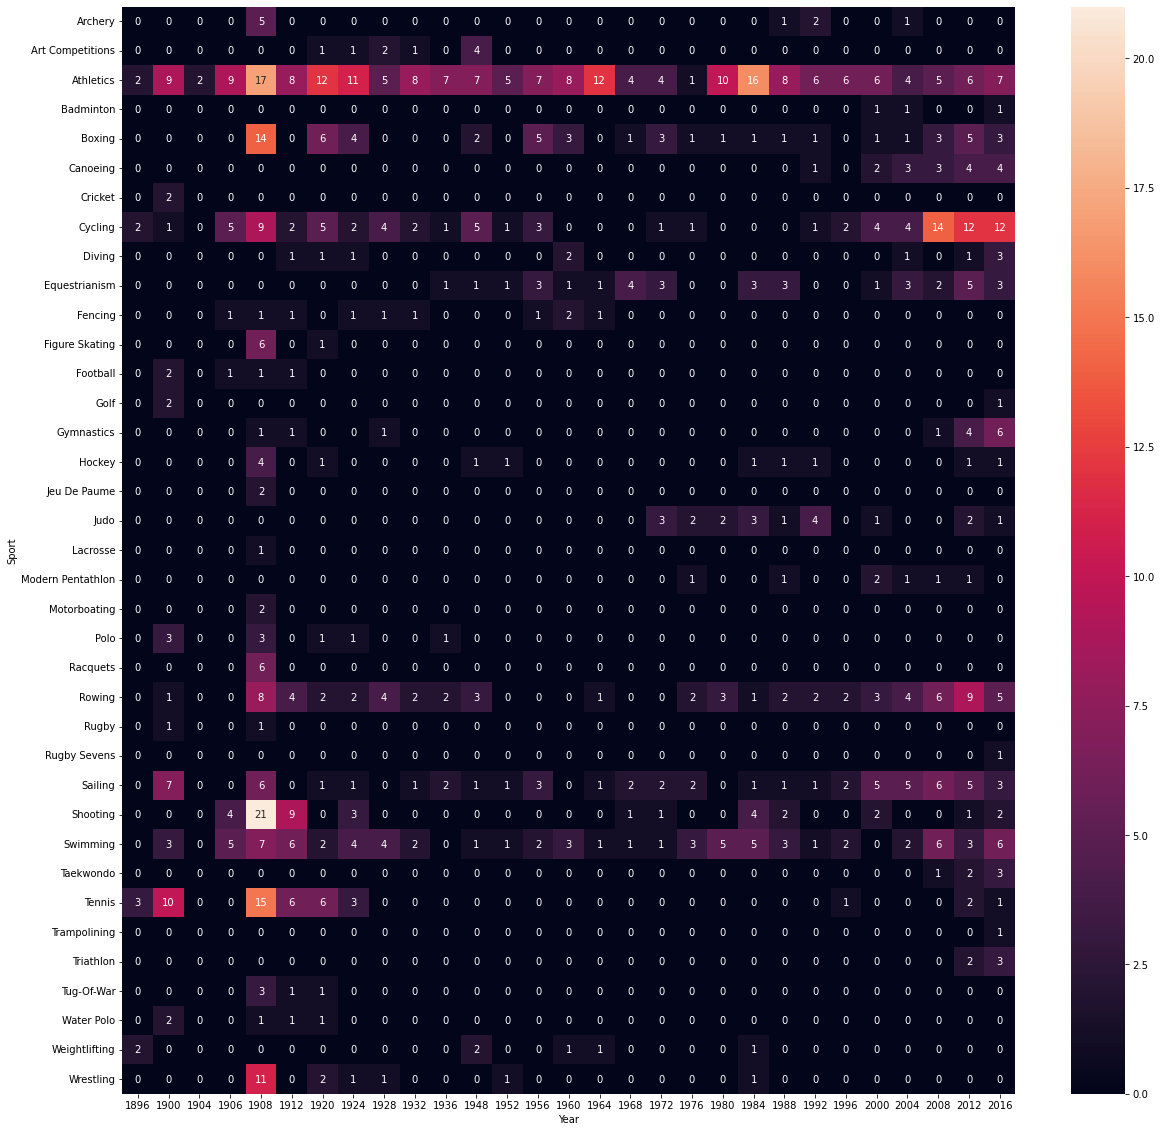

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot_table, annot=True)


In [162]:
def most_successful_athlete(df, country):
    temp_df = df.dropna(subset = ['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
        
    x = temp_df['Name'].value_counts().reset_index().merge(df, left_on = 'index', right_on = 'Name', how = 'left')
    y = x[['index', 'Name_x', 'Sport']].drop_duplicates()
    final_df = y.rename(columns = {'index': 'Name', 'Name_x': 'Medal_count'})
    return final_df.head(10)

In [164]:
most_successful_athlete(df,'Jamaica')

,Name,Medal_count,Sport
0,Merlene Joyce Ottey-Page,9,Athletics
19,Veronica Angella Campbell-Brown,8,Athletics
30,Usain St. Leo Bolt,8,Athletics
40,Shelly-Ann Fraser-Pryce,6,Athletics
47,"Donald O'Reilly ""Don"" Quarrie",4,Athletics
56,"Herbert Henry ""Herb"" McKenley",4,Athletics
62,Arthur Stanley Wint,4,Athletics
68,Novlene Hilaire Williams-Mills,4,Athletics
75,Yohan Blake,4,Athletics
81,Sherone Anmarica Simpson,3,Athletics
